### NAIVE

In [50]:
import pandas as pd
import matplotlib.pyplot as plt


csv_file = "mlp_naive_performance_py.csv"

# Caricamento dei dati nel DataFrame di pandas
try:
    df = pd.read_csv(csv_file)
except FileNotFoundError:
    print(f"Errore: File '{csv_file}' non trovato. Assicurati che sia nella stessa directory del notebook.")
    exit()

df.head()


,BatchSize,TPB_X,TPB_Y,TotalThreads_KernelOrAux,GPUTime_ms,Samples_per_sec,GFLOPS
0,256,8,4,32,30.8719,8292.33,20.82
1,256,4,8,32,30.7379,8328.48,20.91
2,256,16,2,32,31.5317,8118.81,20.39
3,256,2,16,32,31.4428,8141.77,20.44
4,256,8,8,64,16.1896,15812.62,39.70


In [51]:
# Rename 'TotalThreads_KernelOrAux' to 'TotalThreads'
df.rename(columns={'TotalThreads_KernelOrAux': 'TotalThreads'}, inplace=True) 

In [52]:
df_grouped_mean = df.groupby(['BatchSize', 'TotalThreads']).agg({
    'GPUTime_ms': 'mean',
    'GFLOPS': 'mean'
}).reset_index()

df_grouped_mean.head()

,BatchSize,TotalThreads,GPUTime_ms,GFLOPS
0,256,32,31.146075,20.640000
1,256,64,22.150680,31.708000
2,256,128,24.698600,29.146667
3,256,256,26.522043,27.435714
4,256,512,27.893900,26.222500


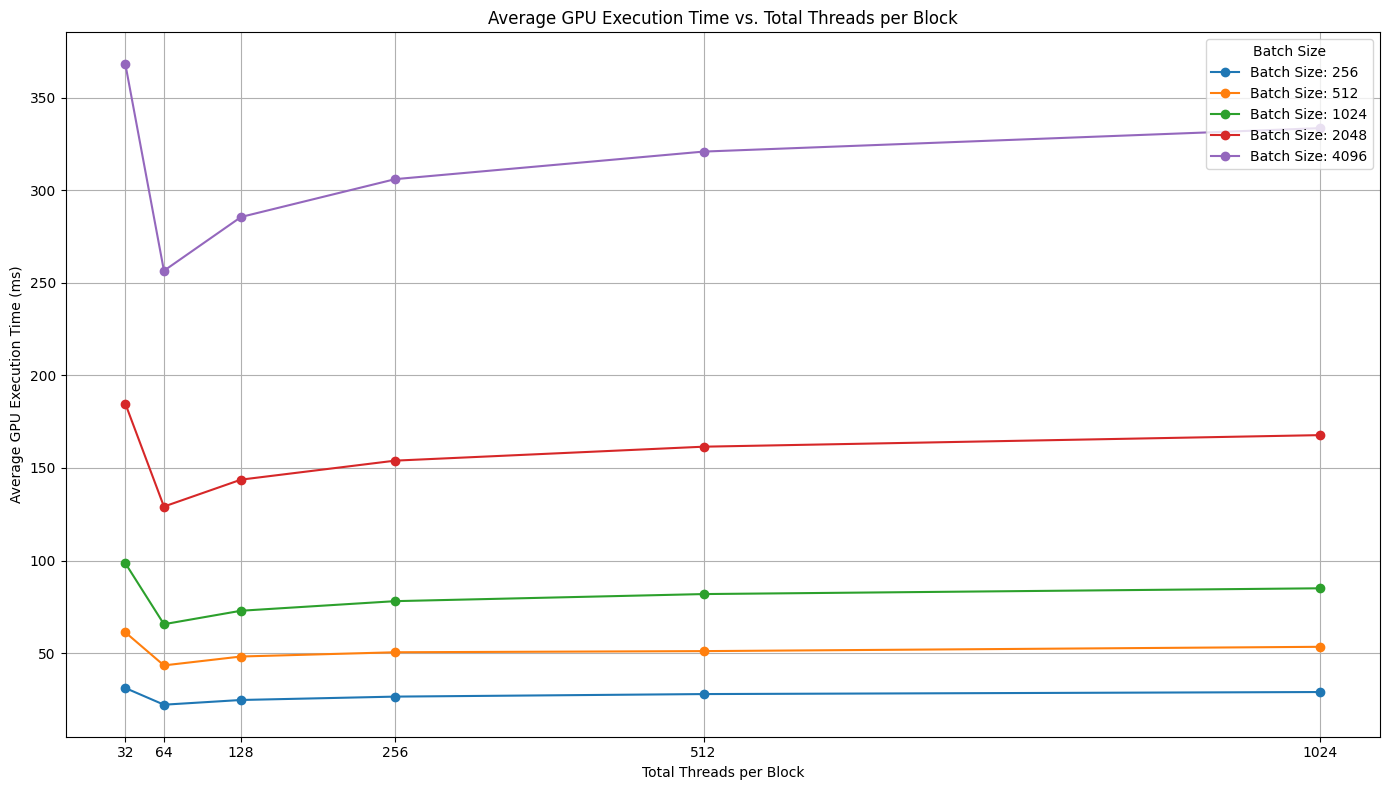

In [53]:
# 2. Creazione del grafico a linee
plt.figure(figsize=(14, 8)) # Dimensioni del grafico

for batch_size in df_grouped_mean['BatchSize'].unique():
    subset = df_grouped_mean[df_grouped_mean['BatchSize'] == batch_size]
    plt.plot(subset['TotalThreads'], subset['GPUTime_ms'], marker='o', label=f'Batch Size: {batch_size}')

# Aggiungi ad x i valori di TotalThreads

plt.xticks(subset['TotalThreads'].unique())
plt.title('Average GPU Execution Time vs. Total Threads per Block')
plt.xlabel('Total Threads per Block')
plt.ylabel('Average GPU Execution Time (ms)')
plt.legend(title='Batch Size')
plt.grid(True)
plt.tight_layout()






In [54]:
# Calcolo SPEED-UP per ogni Batch Size tra esecuzione con 1 thread e con n threads per blocco
df_grouped_speedup = df_grouped_mean.copy()

# We get the GPUTime_ms for 32 for each batch size
time_ms_at_32_thread = df_grouped_speedup[df_grouped_speedup['TotalThreads'] == 32]['GPUTime_ms']

# Then to get the speedup (for each batch size) we divide the time at 32 threads by the time at n threads
# Each batch size has its own time at 32 threads

for i, batch_size in enumerate(df_grouped_speedup['BatchSize'].unique()):
    time_ms_at_32 = time_ms_at_32_thread.values[i]
    df_grouped_speedup.loc[df_grouped_speedup['BatchSize'] == batch_size, 'SPEEDUP'] = time_ms_at_32 / df_grouped_speedup['GPUTime_ms']

In [55]:
df_grouped_speedup

,BatchSize,TotalThreads,GPUTime_ms,GFLOPS,SPEEDUP
0,256,32,31.146075,20.640000,1.000000
1,256,64,22.150680,31.708000,1.406100
2,256,128,24.698600,29.146667,1.261046
3,256,256,26.522043,27.435714,1.174347
4,256,512,27.893900,26.222500,1.116591
5,256,1024,28.996629,25.574286,1.074127
6,512,32,61.189375,21.015000,1.000000
7,512,64,43.372560,32.416000,1.410785
8,512,128,48.175150,29.960000,1.270144
9,512,256,50.469543,28.870000,1.212402


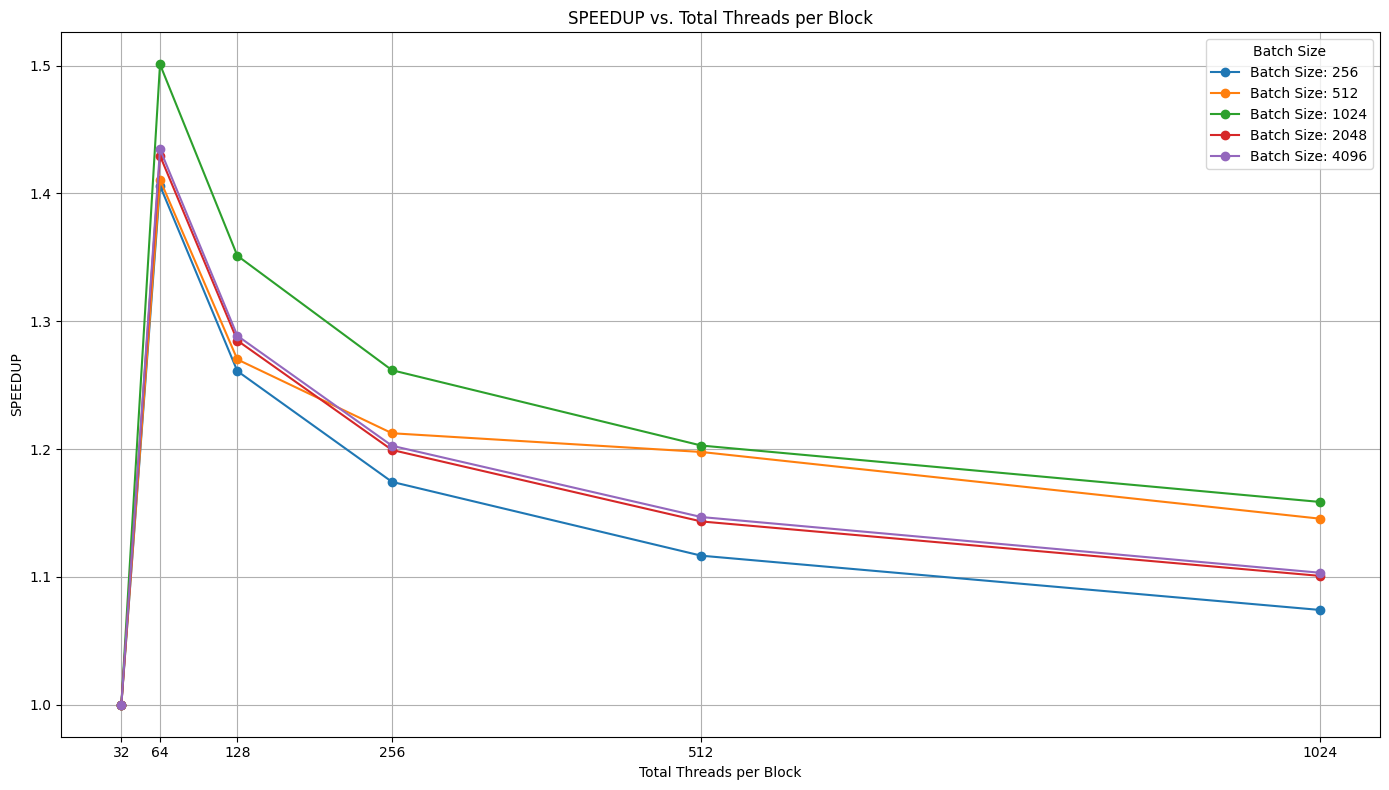

In [56]:
# Grafico SPEED-UP
plt.figure(figsize=(14, 8)) # Dimensioni del grafico

for batch_size in df_grouped_speedup['BatchSize'].unique():
    subset = df_grouped_speedup[df_grouped_speedup['BatchSize'] == batch_size]
    plt.plot(subset['TotalThreads'], subset['SPEEDUP'], marker='o', label=f'Batch Size: {batch_size}')
# Aggiungi ad x i valori di TotalThreads
plt.xticks(subset['TotalThreads'].unique())

plt.title('SPEEDUP vs. Total Threads per Block')
plt.xlabel('Total Threads per Block')
plt.ylabel('SPEEDUP')
plt.legend(title='Batch Size')
plt.grid(True)
plt.tight_layout()

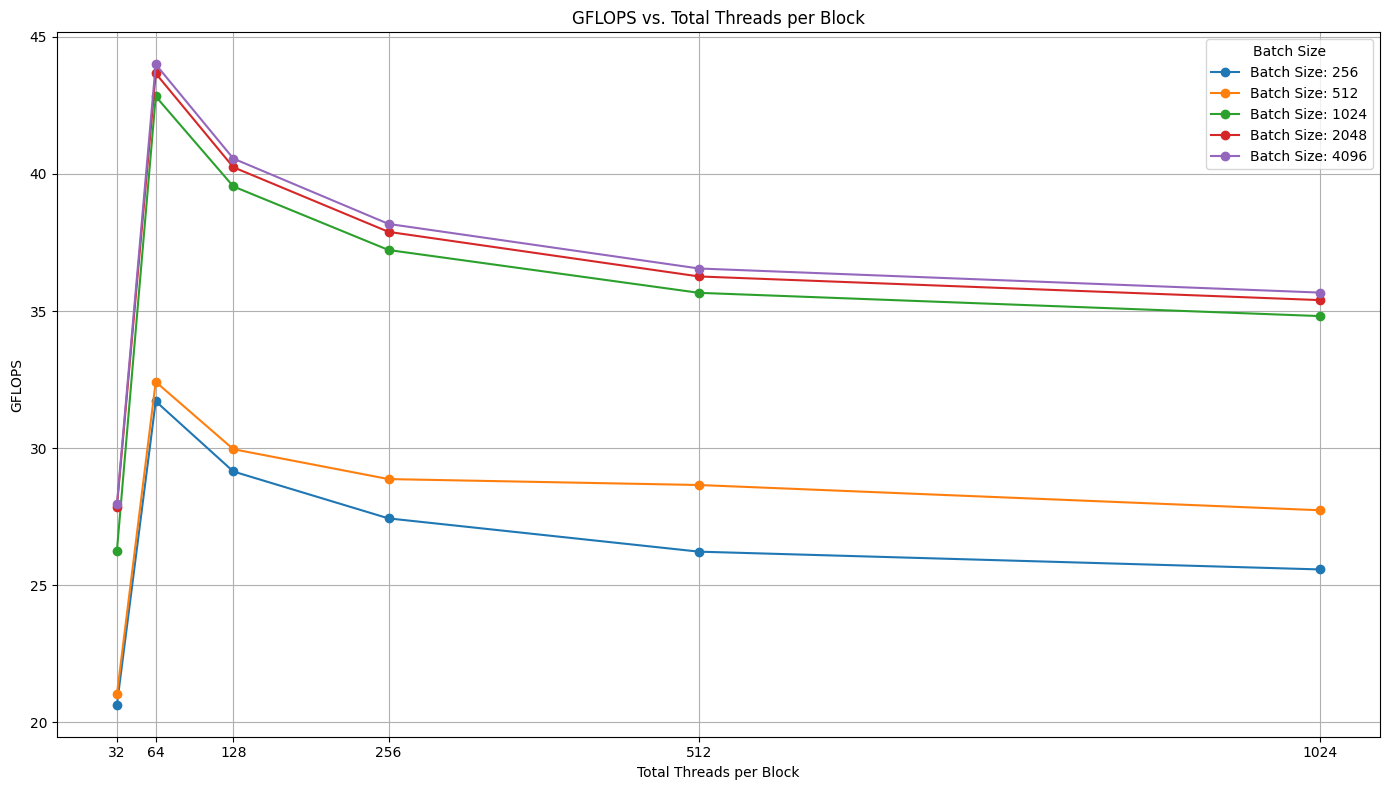

In [57]:
# Visualizziamo GFLPOs come funzione del numero di thread
plt.figure(figsize=(14, 8)) # Dimensioni del grafico
for batch_size in df_grouped_mean['BatchSize'].unique():
    subset = df_grouped_mean[df_grouped_mean['BatchSize'] == batch_size]
    plt.plot(subset['TotalThreads'], subset['GFLOPS'], marker='o', label=f'Batch Size: {batch_size}')

# Aggiungi ad x i valori di TotalThreads
plt.xticks(subset['TotalThreads'].unique())

plt.title('GFLOPS vs. Total Threads per Block')
plt.xlabel('Total Threads per Block')
plt.ylabel('GFLOPS')
plt.legend(title='Batch Size')
plt.grid(True)
plt.tight_layout()


#### SCALING

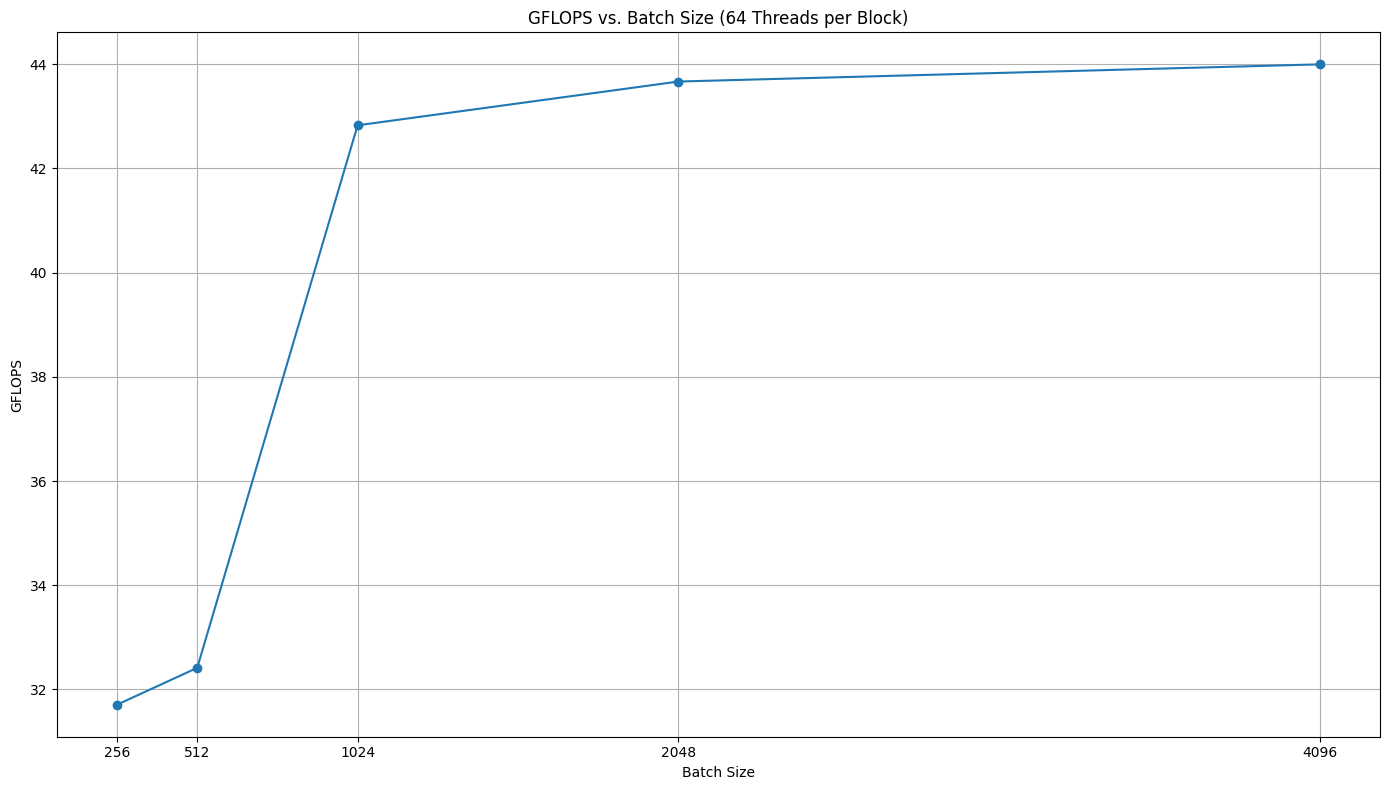

In [58]:
# Take just the esperiments with 64 threads per block
df_grouped_mean_64 = df_grouped_mean[df_grouped_mean['TotalThreads'] == 64]

# Then plot the GFLOPS vs Batch Size
plt.figure(figsize=(14, 8)) # Dimensioni del grafico
plt.plot(df_grouped_mean_64['BatchSize'], df_grouped_mean_64['GFLOPS'], marker='o')
# Aggiungi ad x i valori di TotalThreads
plt.xticks(df_grouped_mean_64['BatchSize'].unique())
plt.title('GFLOPS vs. Batch Size (64 Threads per Block)')
plt.xlabel('Batch Size')
plt.ylabel('GFLOPS')
plt.grid(True)
plt.tight_layout()


### COSTANT MEMORY FOR BIAS

In [59]:
csv_file = "mlp_constant_performance_py.csv"

# Caricamento dei dati nel DataFrame di pandas
try:
    df = pd.read_csv(csv_file)
except FileNotFoundError:
    print(f"Errore: File '{csv_file}' non trovato. Assicurati che sia nella stessa directory del notebook.")
    exit()

df.head()


,BatchSize,TPB_X,TPB_Y,TotalThreads_KernelOrAux,GPUTime_ms,Samples_per_sec,GFLOPS
0,256,8,4,32,30.0585,8516.73,21.39
1,256,4,8,32,30.0583,8516.78,21.39
2,256,16,2,32,30.8716,8292.41,20.82
3,256,2,16,32,30.7200,8333.33,20.92
4,256,8,8,64,15.4911,16525.62,41.49


In [60]:
# Rename 'TotalThreads_KernelOrAux' to 'TotalThreads'
df.rename(columns={'TotalThreads_KernelOrAux': 'TotalThreads'}, inplace=True) 

df_grouped_mean = df.groupby(['BatchSize', 'TotalThreads']).agg({
    'GPUTime_ms': 'mean',
    'GFLOPS': 'mean'
}).reset_index()

df_grouped_mean.head()

,BatchSize,TotalThreads,GPUTime_ms,GFLOPS
0,256,32,30.427100,21.130000
1,256,64,21.481360,32.876000
2,256,128,23.961533,30.285000
3,256,256,25.780100,28.434286
4,256,512,27.070813,27.175000


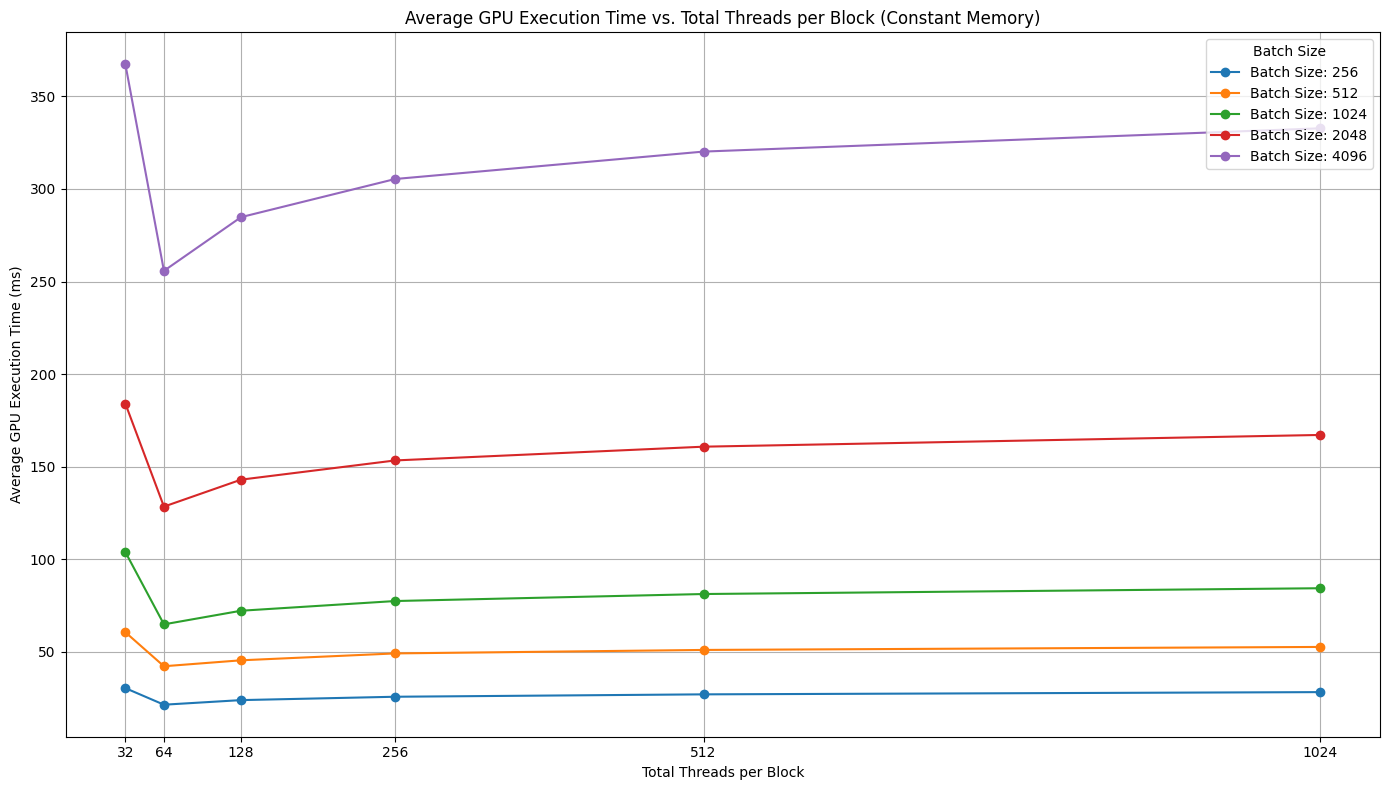

In [61]:
# 2. Creazione del grafico a linee
plt.figure(figsize=(14, 8)) # Dimensioni del grafico

for batch_size in df_grouped_mean['BatchSize'].unique():
    subset = df_grouped_mean[df_grouped_mean['BatchSize'] == batch_size]
    plt.plot(subset['TotalThreads'], subset['GPUTime_ms'], marker='o', label=f'Batch Size: {batch_size}')

# Aggiungi ad x i valori di TotalThreads
plt.xticks(subset['TotalThreads'].unique())
plt.title('Average GPU Execution Time vs. Total Threads per Block (Constant Memory)')
plt.xlabel('Total Threads per Block')
plt.ylabel('Average GPU Execution Time (ms)')
plt.legend(title='Batch Size')
plt.grid(True)
plt.tight_layout()



In [62]:
# Calcolo SPEED-UP per ogni Batch Size tra esecuzione con 1 thread e con n threads per blocco
df_grouped_speedup = df_grouped_mean.copy()

# We get the GPUTime_ms for 32 for each batch size
time_ms_at_32_thread = df_grouped_speedup[df_grouped_speedup['TotalThreads'] == 32]['GPUTime_ms']

# Then to get the speedup (for each batch size) we divide the time at 32 threads by the time at n threads
# Each batch size has its own time at 32 threads

for i, batch_size in enumerate(df_grouped_speedup['BatchSize'].unique()):
    time_ms_at_32 = time_ms_at_32_thread.values[i]
    df_grouped_speedup.loc[df_grouped_speedup['BatchSize'] == batch_size, 'SPEEDUP'] = time_ms_at_32 / df_grouped_speedup['GPUTime_ms']

In [63]:
df_grouped_speedup

,BatchSize,TotalThreads,GPUTime_ms,GFLOPS,SPEEDUP
0,256,32,30.427100,21.130000,1.000000
1,256,64,21.481360,32.876000,1.416442
2,256,128,23.961533,30.285000,1.269831
3,256,256,25.780100,28.434286,1.180255
4,256,512,27.070813,27.175000,1.123982
5,256,1024,28.279229,26.438571,1.075952
6,512,32,60.599050,21.220000,1.000000
7,512,64,42.248220,33.406000,1.434357
8,512,128,45.457867,31.861667,1.333082
9,512,256,49.178429,29.861429,1.232228


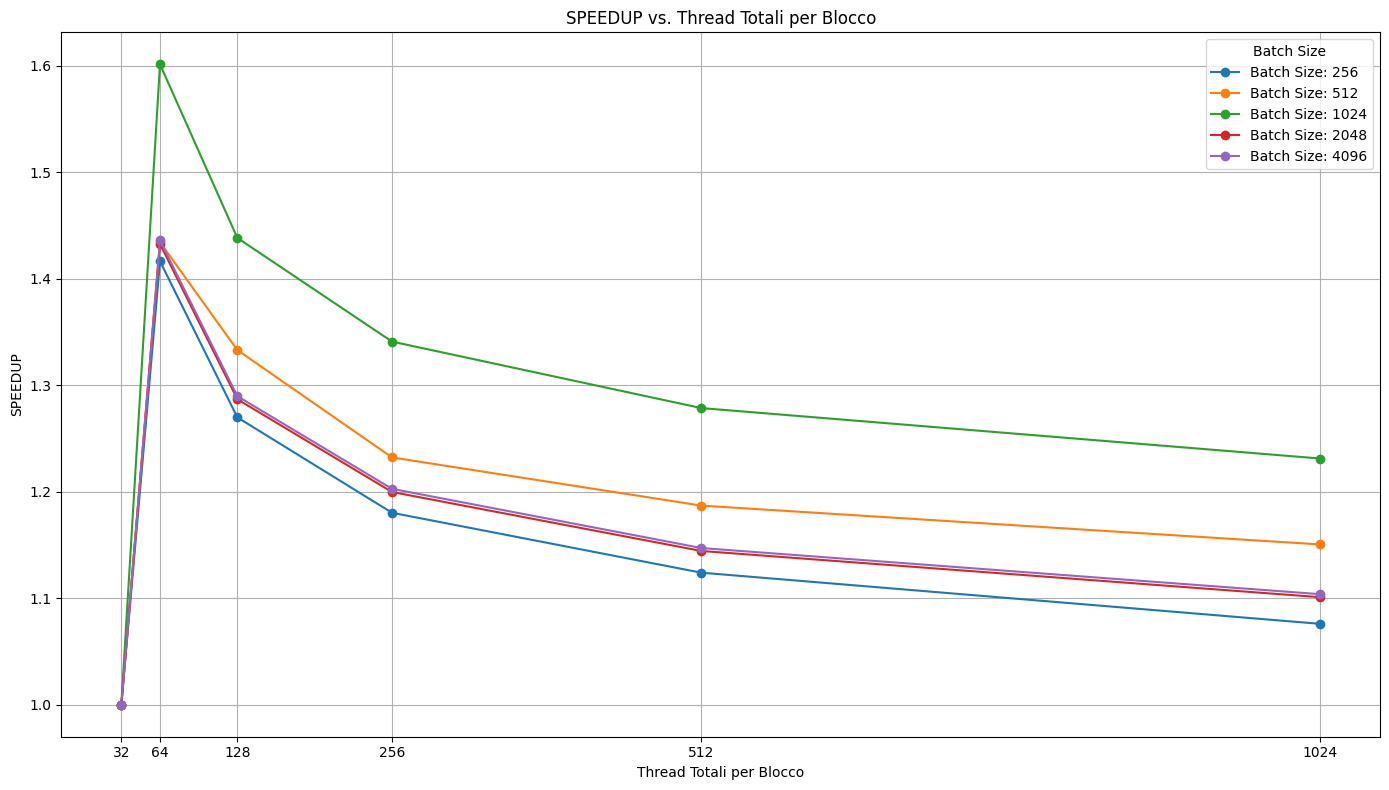

In [64]:
# Grafico SPEED-UP
plt.figure(figsize=(14, 8)) # Dimensioni del grafico

for batch_size in df_grouped_speedup['BatchSize'].unique():
    subset = df_grouped_speedup[df_grouped_speedup['BatchSize'] == batch_size]
    plt.plot(subset['TotalThreads'], subset['SPEEDUP'], marker='o', label=f'Batch Size: {batch_size}')
# Aggiungi ad x i valori di TotalThreads
plt.xticks(subset['TotalThreads'].unique())
plt.title('SPEEDUP vs. Thread Totali per Blocco')
plt.xlabel('Thread Totali per Blocco')
plt.ylabel('SPEEDUP')
plt.legend(title='Batch Size')
plt.grid(True)
plt.tight_layout()

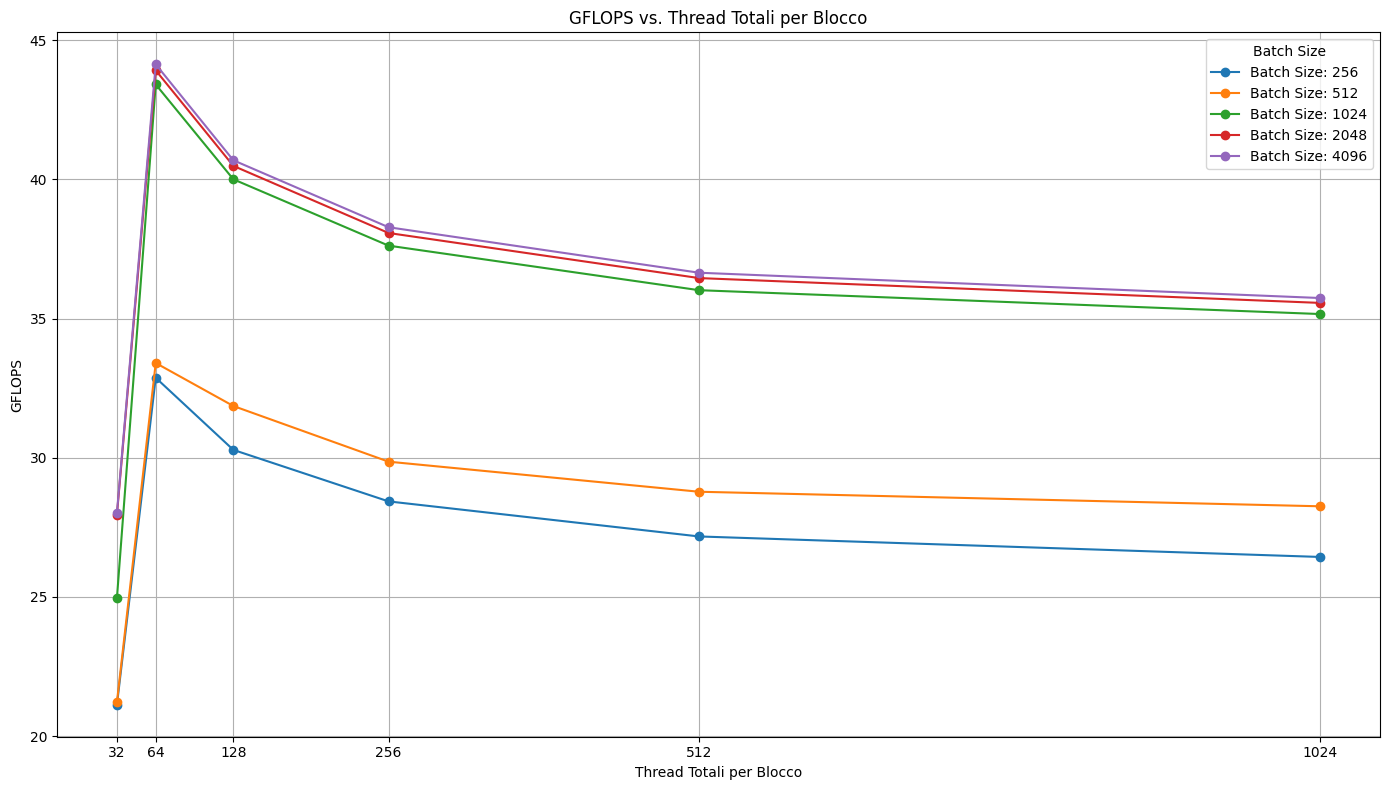

In [65]:
# Visualizziamo GFLPOs come funzione del numero di thread
plt.figure(figsize=(14, 8)) # Dimensioni del grafico
for batch_size in df_grouped_mean['BatchSize'].unique():
    subset = df_grouped_mean[df_grouped_mean['BatchSize'] == batch_size]
    plt.plot(subset['TotalThreads'], subset['GFLOPS'], marker='o', label=f'Batch Size: {batch_size}')

# Aggiungi ad x i valori di TotalThreads
plt.xticks(subset['TotalThreads'].unique())
plt.title('GFLOPS vs. Thread Totali per Blocco')
plt.xlabel('Thread Totali per Blocco')
plt.ylabel('GFLOPS')
plt.legend(title='Batch Size')
plt.grid(True)
plt.tight_layout()


### OPTIMIZED

In [66]:
csv_file = "mlp_cublas_performance_py.csv"

# Caricamento dei dati nel DataFrame di pandas
try:
    df = pd.read_csv(csv_file)
except FileNotFoundError:
    print(f"Errore: File '{csv_file}' non trovato. Assicurati che sia nella stessa directory del notebook.")
    exit()

df.head()


,BatchSize,TPB_X,TPB_Y,TotalThreads_KernelOrAux,GPUTime_ms,Samples_per_sec,GFLOPS
0,256,8,4,32,56.2068,4554.61,11.44
1,256,4,8,32,18.6794,13704.94,34.41
2,256,16,2,32,19.1420,13373.73,33.58
3,256,2,16,32,13.3998,19104.76,47.97
4,256,8,8,64,12.6179,20288.64,50.94


In [67]:
# Rename 'TotalThreads_KernelOrAux' to 'TotalThreads'
df.rename(columns={'TotalThreads_KernelOrAux': 'TotalThreads'}, inplace=True)

df_grouped_mean = df.groupby(['BatchSize', 'TotalThreads']).agg({
    'GPUTime_ms': 'mean',
    'GFLOPS': 'mean'
}).reset_index()

df_grouped_mean.head()

,BatchSize,TotalThreads,GPUTime_ms,GFLOPS
0,256,32,26.857000,31.850000
1,256,64,12.800100,50.308000
2,256,128,12.519017,51.610000
3,256,256,11.753271,54.827143
4,256,512,11.445825,56.213750


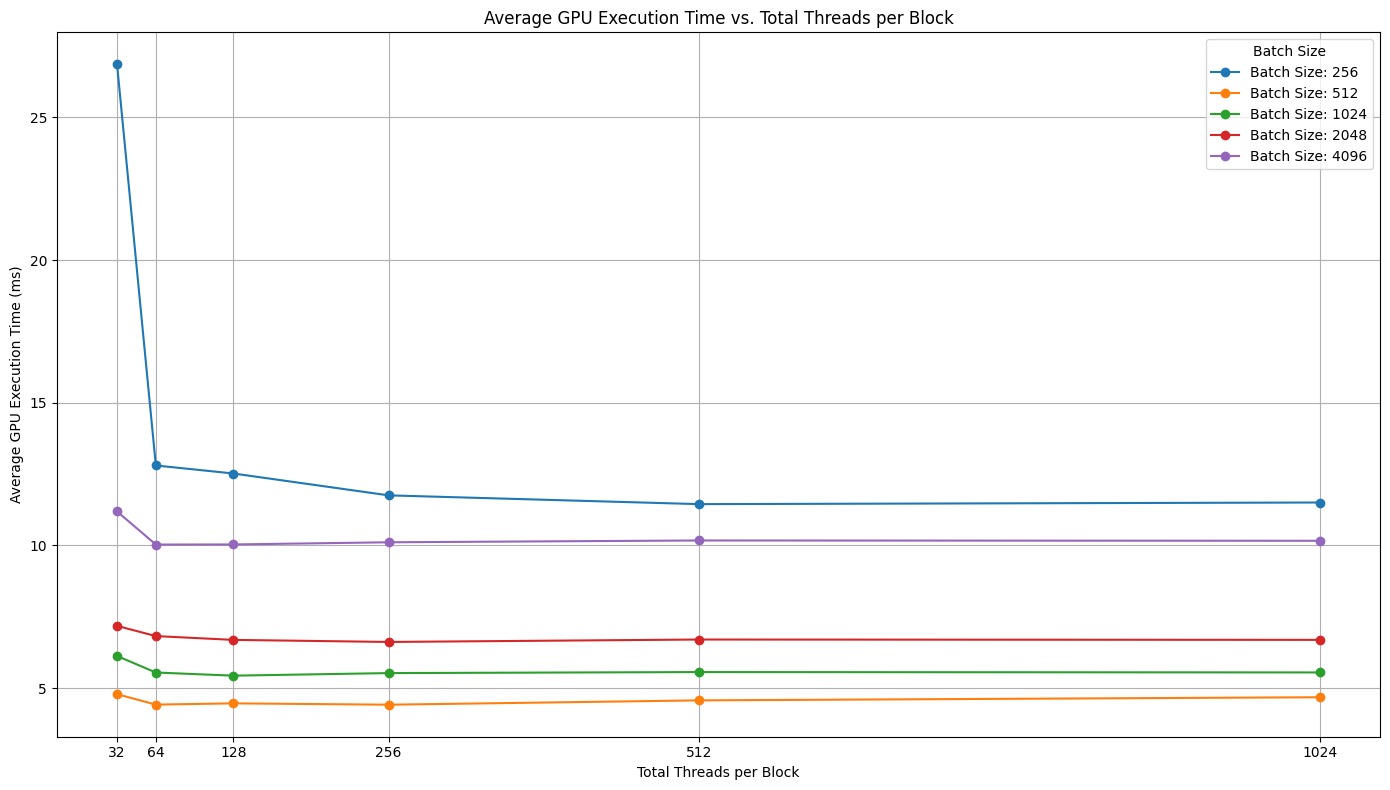

In [68]:
# 2. Creazione del grafico a linee
plt.figure(figsize=(14, 8)) # Dimensioni del grafico

for batch_size in df_grouped_mean['BatchSize'].unique():
    subset = df_grouped_mean[df_grouped_mean['BatchSize'] == batch_size]
    plt.plot(subset['TotalThreads'], subset['GPUTime_ms'], marker='o', label=f'Batch Size: {batch_size}')

# Aggiungi ad x i valori di TotalThreads
plt.xticks(subset['TotalThreads'].unique())
plt.title('Average GPU Execution Time vs. Total Threads per Block')
plt.xlabel('Total Threads per Block')
plt.ylabel('Average GPU Execution Time (ms)')

plt.legend(title='Batch Size')
plt.grid(True)
plt.tight_layout()



In [69]:
# Calcolo SPEED-UP per ogni Batch Size tra esecuzione con 1 thread e con n threads per blocco
df_grouped_speedup = df_grouped_mean.copy()

# We get the GPUTime_ms for 32 for each batch size
time_ms_at_32_thread = df_grouped_speedup[df_grouped_speedup['TotalThreads'] == 32]['GPUTime_ms']

# Then to get the speedup (for each batch size) we divide the time at 32 threads by the time at n threads
# Each batch size has its own time at 32 threads

for i, batch_size in enumerate(df_grouped_speedup['BatchSize'].unique()):
    time_ms_at_32 = time_ms_at_32_thread.values[i]
    df_grouped_speedup.loc[df_grouped_speedup['BatchSize'] == batch_size, 'SPEEDUP'] = time_ms_at_32 / df_grouped_speedup['GPUTime_ms']

In [70]:
df_grouped_speedup

,BatchSize,TotalThreads,GPUTime_ms,GFLOPS,SPEEDUP
0,256,32,26.857000,31.850000,1.000000
1,256,64,12.800100,50.308000,2.098187
2,256,128,12.519017,51.610000,2.145296
3,256,256,11.753271,54.827143,2.285066
4,256,512,11.445825,56.213750,2.346445
5,256,1024,11.502757,56.005714,2.334832
6,512,32,4.785850,268.970000,1.000000
7,512,64,4.419980,291.034000,1.082776
8,512,128,4.464817,288.191667,1.071903
9,512,256,4.417157,292.615714,1.083468


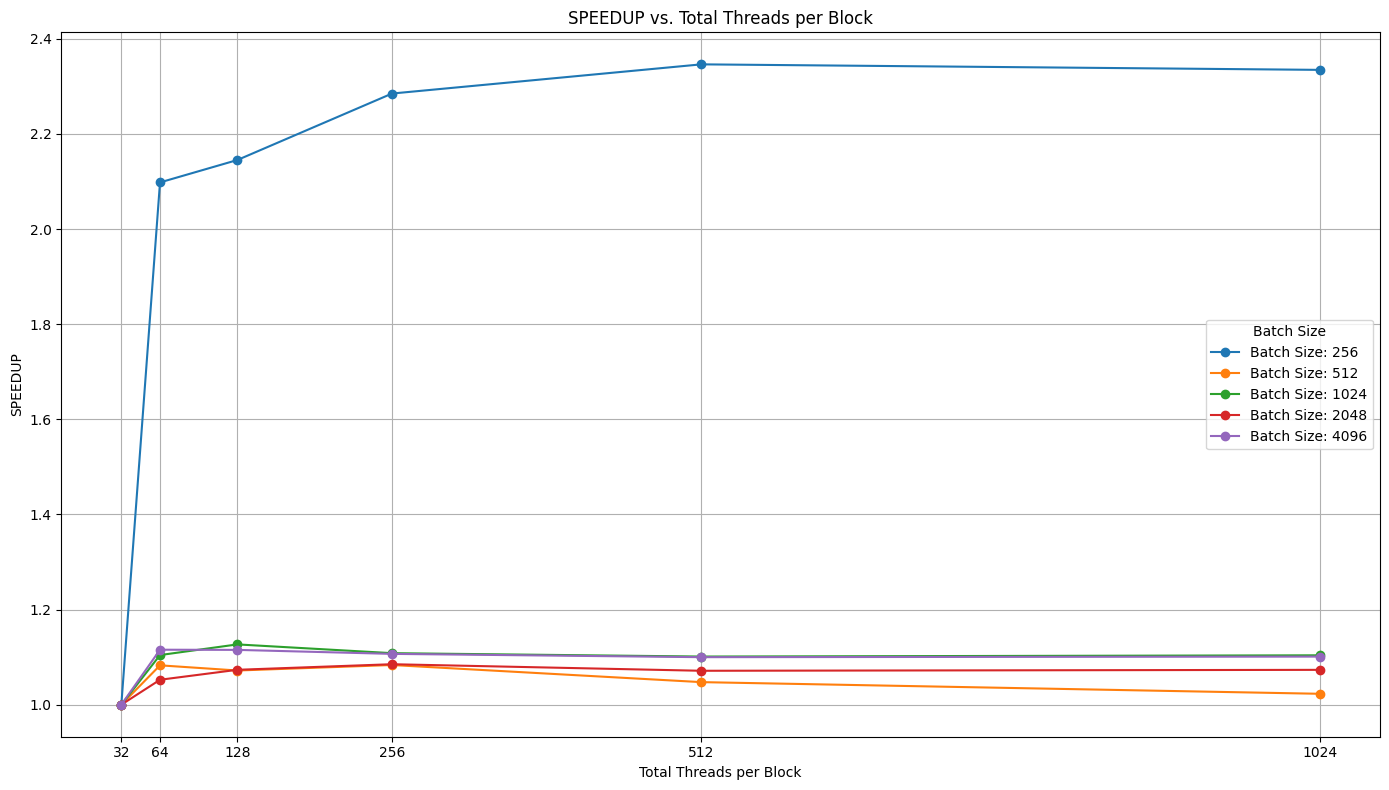

In [71]:
# Grafico SPEED-UP
plt.figure(figsize=(14, 8)) # Dimensioni del grafico

for batch_size in df_grouped_speedup['BatchSize'].unique():
    subset = df_grouped_speedup[df_grouped_speedup['BatchSize'] == batch_size]
    plt.plot(subset['TotalThreads'], subset['SPEEDUP'], marker='o', label=f'Batch Size: {batch_size}')
# Aggiungi ad x i valori di TotalThreads
plt.xticks(subset['TotalThreads'].unique())

plt.title('SPEEDUP vs. Total Threads per Block')
plt.xlabel('Total Threads per Block')
plt.ylabel('SPEEDUP')
plt.legend(title='Batch Size')
plt.grid(True)
plt.tight_layout()

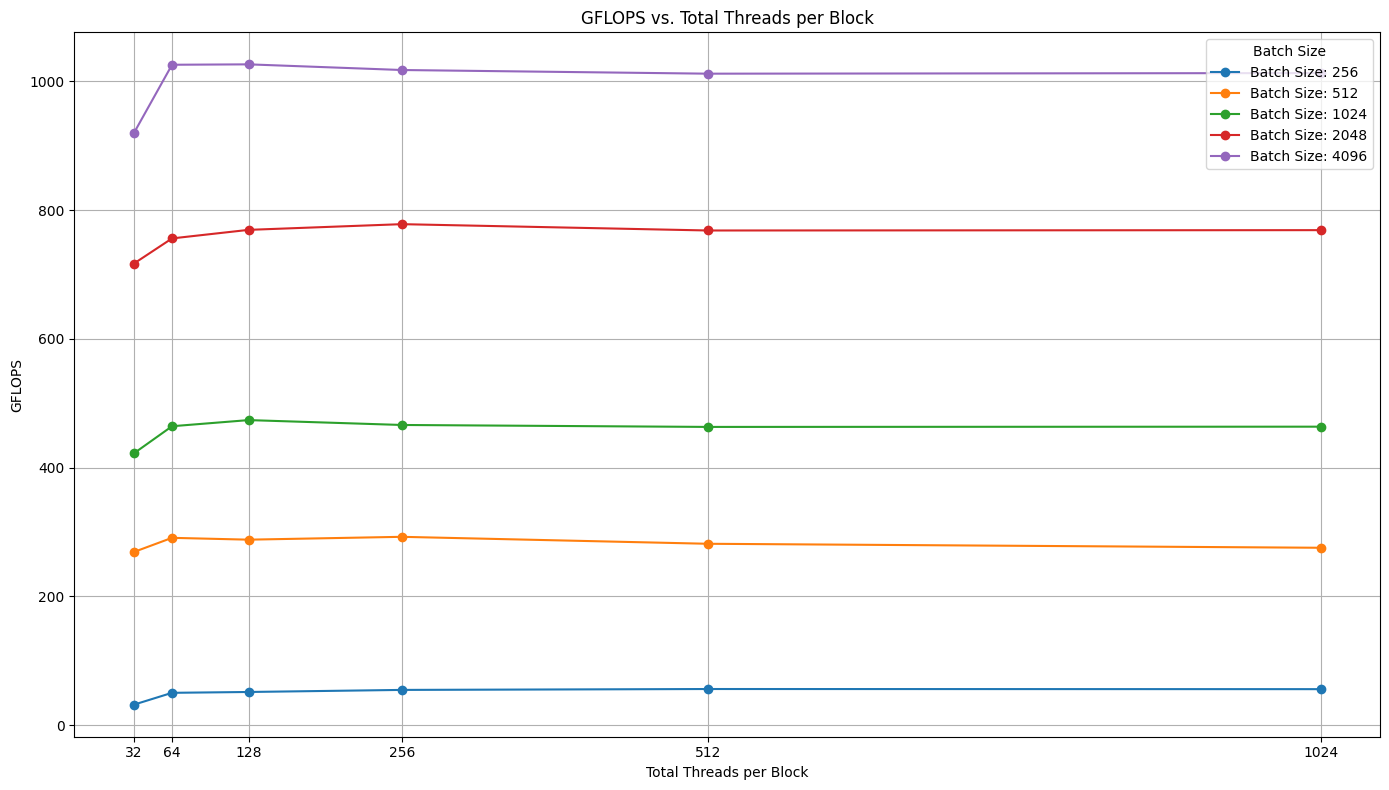

In [72]:
# Visualizziamo GFLPOs come funzione del numero di thread
plt.figure(figsize=(14, 8)) # Dimensioni del grafico
for batch_size in df_grouped_mean['BatchSize'].unique():
    subset = df_grouped_mean[df_grouped_mean['BatchSize'] == batch_size]
    plt.plot(subset['TotalThreads'], subset['GFLOPS'], marker='o', label=f'Batch Size: {batch_size}')

# Aggiungi ad x i valori di TotalThreads
plt.xticks(subset['TotalThreads'].unique())
plt.title('GFLOPS vs. Total Threads per Block')
plt.xlabel('Total Threads per Block')
plt.ylabel('GFLOPS')
plt.legend(title='Batch Size')
plt.grid(True)
plt.tight_layout()


#### SCALING


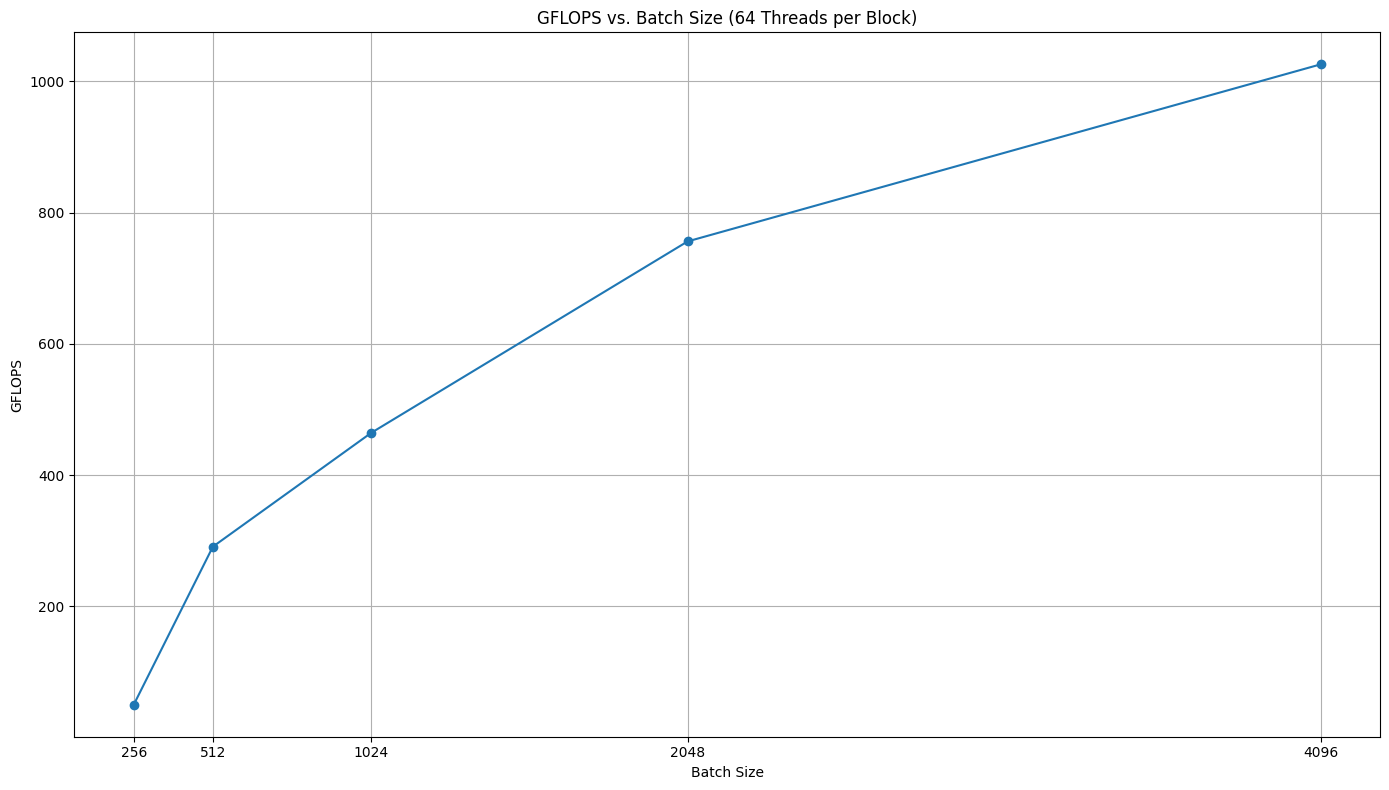

In [73]:
# Take just the esperiments with 64 threads per block
df_grouped_mean_64 = df_grouped_mean[df_grouped_mean['TotalThreads'] == 64]

# Then plot the GFLOPS vs Batch Size
plt.figure(figsize=(14, 8)) # Dimensioni del grafico
plt.plot(df_grouped_mean_64['BatchSize'], df_grouped_mean_64['GFLOPS'], marker='o')
# Aggiungi ad x i valori di TotalThreads
plt.xticks(df_grouped_mean_64['BatchSize'].unique())

plt.title('GFLOPS vs. Batch Size (64 Threads per Block)')
plt.xlabel('Batch Size')
plt.ylabel('GFLOPS')
plt.grid(True)
plt.tight_layout()
